In [1]:
# Required libraries
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# dataset load
imdb = keras.datasets.imdb

# Top 10000 words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print('* Sample size\n')
print('training samples : {},  labels : {}'.format(train_data.shape,train_labels.shape))

print('\n* Sample type : {}\n'.format(type(train_data[0][0])))
print('>> show the array example: {}'.format(train_data[0][0:10]))

* Sample size

training samples : (25000,),  labels : (25000,)

* Sample type : <class 'int'>

>> show the array example: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [4]:
print('* NOTE) Each review (feature) is converted as integer array\n')
for i in range(5):
  print('#{}. length of each review : {}'.format(i+1,len(train_data[i])))

print('\n\n* NOTE) Each label is converted as binary\n')
for i in range(5):
  print('#{}. positive is 1, negative is 0 : {}'.format(i+1,train_labels[i]))

* NOTE) Each review (feature) is converted as integer array

#1. length of each review : 218
#2. length of each review : 189
#3. length of each review : 141
#4. length of each review : 550
#5. length of each review : 147


* NOTE) Each label is converted as binary

#1. positive is 1, negative is 0 : 1
#2. positive is 1, negative is 0 : 0
#3. positive is 1, negative is 0 : 0
#4. positive is 1, negative is 0 : 1
#5. positive is 1, negative is 0 : 0


In [5]:
label_check = pd.DataFrame(train_labels,columns={'class'})

positives = label_check[label_check['class'] == 1].count().sum()
negatives = label_check[label_check['class'] == 0].count().sum()

print('* The balanced label data given\n')
print('>> # of positive: {},  # of negative: {}'.format(positives,negatives))

* The balanced label data given

>> # of positive: 12500,  # of negative: 12500


In [6]:
# dictionary = {word: index}
word_index = imdb.get_word_index()

# define the basic keys in dictionary
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# convert original text (review)
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [7]:
### Convert to 'Tensor' & Match the vector length to the same length
## Methods
# One-Hot Encoding : 정수 배열을 0과 1로 이루어진 벡터로 변환. 전체 단어 개수에 length를 맞추므로 메모리 많이 사용
# Padding : 기존 정수 배열에 최대 길이 벡터의 length 만큼 0을 붙여주는 방법

## .pad_sequence()
# value = Float or String, padding value. (Optional, defaults to 0.)
# padding = String, 'pre' or 'post' (optional, defaults to 'pre'): pad either before or after each sequence.
# maxlen = 	Optional Int, maximum length of all sequences.
#           If not provided, sequences will be padded to the length of the longest individual sequence.

# * 지정한 maxlen 값보다 시퀀스의 배열 길이가 큰 경우 배열의 앞의 값에서부터 (default) 잘라내어 maxlen 값으로 길이를 맞춘다.
# 자르는 부분을 지정하는 함수는 truncating = 'pre' (앞, default) / 'post' (뒤) 로 지정 가능

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"], # word_index["<PAD>"] is 0
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

# check the padded sequence
print('(# of reviews, maxlen) = {}'.format(train_data.shape))
print()
print('Padded results: \n',train_data[0])

(# of reviews, maxlen) = (25000, 256)

Padded results: 
 [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144

In [8]:
# Input size
vocab_size = 10000
# Embedding size
embed_size = 16

# Model construction
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embed_size, input_shape=(None,))) # word embedding
model.add(keras.layers.GlobalAveragePooling1D()) # convert 1D vector
model.add(keras.layers.Dense(embed_size, activation='relu')) # hidden layer
model.add(keras.layers.Dropout(0.5)) # prevent overfitting
model.add(keras.layers.Dense(embed_size, activation='relu')) # hidden layer
model.add(keras.layers.Dense(1, activation='sigmoid')) # output is probability

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,561
Trainable params: 160,561
Non-trainable params: 0
__________________________________________________

In [9]:
# for backpropagation
model.compile(optimizer='adam', # select the optimization algorithm
              loss='binary_crossentropy', # for the output of probability
              metrics=['accuracy'])

In [10]:
# 훈련 데이터셋만 가지고 모델 학습 및 검증
# 테스트 데이터셋은 모델이 만난 적 없는 데이터로, 최종적인 정확도 평가를 위함

# split the dataset into train,test
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
## Model training
# verbose: Integer. 0, 1, or 2. 
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 40ms/step - loss: 0.6929 - accuracy: 0.5061 - val_loss: 0.6910 - val_accuracy: 0.6629
Epoch 2/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6896 - accuracy: 0.6209 - val_loss: 0.6812 - val_accuracy: 0.6680
Epoch 3/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6755 - accuracy: 0.7098 - val_loss: 0.6514 - val_accuracy: 0.7607
Epoch 4/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6377 - accuracy: 0.7744 - val_loss: 0.5836 - val_accuracy: 0.8157
Epoch 5/40
30/30 [==============================] - 1s 20ms/step - loss: 0.5606 - accuracy: 0.8119 - val_loss: 0.4923 - val_accuracy: 0.8418
Epoch 6/40
30/30 [==============================] - 1s 20ms/step - loss: 0.4692 - accuracy: 0.8459 - val_loss: 0.4113 - val_accuracy: 0.8607
Epoch 7/40
30/30 [==============================] - 1s 20ms/step - loss: 0.3949 - accuracy: 0.8652 - val_loss: 0.3566 - val_accuracy: 0.8721
Epoch 8/40
30

In [12]:
## Model evaluation
results = model.evaluate(test_data,  test_labels, verbose=2)
print(results)

782/782 - 1s - loss: 0.6143 - accuracy: 0.8563
[0.6142776012420654, 0.8562800288200378]


In [13]:
# check the information in model training process (use .history)
history_dict = history.history
history_dict.keys() # we can check

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

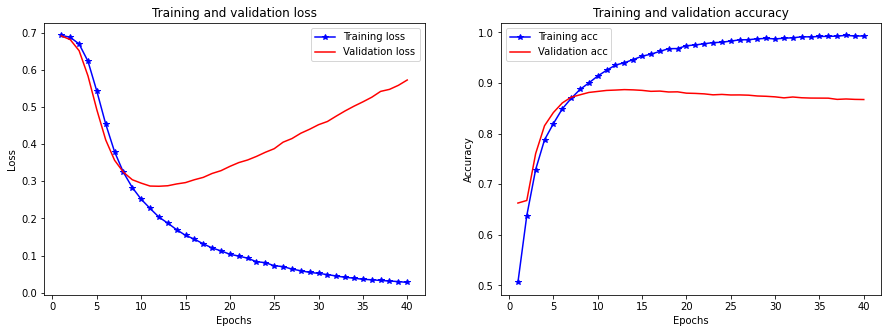

In [14]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (15,5))
# Loss function plot
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b-*', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'b-*', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# the best EPOCH = nearly 20

In [15]:
output = model.predict(test_data)
prediction = output.round().astype('int')

print('* prediction: ',prediction[0:20].reshape(-1))
print('* true label: ',test_labels[0:20])

* prediction:  [0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0]
* true label:  [0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0]
